# WeatherPy
----

### Analysis
* As expected, the weather becomes significantly warmer as one approaches the equator (0 Deg. Latitude). More interestingly, however, is the fact that the southern hemisphere tends to be warmer this time of year than the northern hemisphere. This may be due to the tilt of the earth.
* There is no strong relationship between latitude and cloudiness. However, it is interesting to see that a strong band of cities sits at 0, 80, and 100% cloudiness.
* There is no strong relationship between latitude and wind speed. However, in northern hemispheres there is a flurry of cities with over 20 mph of wind.

---

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [69]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import csv
import os

# Import API key
from api_keys import api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [83]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=20)
lngs = np.random.uniform(low=-180.000, high=180.000, size=20)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

#replace space with +
cities = [city.replace(" ", "+") for city in cities]
len(cities)

146

In [101]:
#Testing time.sleep function. Using it to limit API calls per minute
#for x in range(11):
#    print(x)
#    time.sleep(1.1)
    
#print("Done looping")

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [94]:
# Save config information
url = "http://api.openweathermap.org/data/2.5/weather?"

citi = []
cloudiness = []
country = []
date = []
humidity = []
lat = []
lng = []
max_temp = []
wind_speed  = []

# Build query URL
#query_url = url + "appid=" + api_key + "&q=" + city

# Get weather data
#city_weather = requests.get(query_url).json()


# Get the temperature from the response
#for city in cities:
   # count += 1
   # print(f"This is index {count} from {city}")

print("Begin Data Retrieval")
print("--------------------------")
count = 1
set = 1
for city in cities:
    try:
        query_url = url + "appid=" + api_key + "&q=" + city
        city_weather = requests.get(query_url).json()
        print(f"Processing record {count} of set {set} | {city_weather['name']}")
        
        citi.append(city_weather['name'])
        cloudiness.append(city_weather['clouds']['all'])
        country.append(city_weather['sys']['country'])
        date.append(city_weather['dt'])
        humidity.append(city_weather['main']['humidity'])
        lat.append(city_weather['coord']['lat'])
        lng.append(city_weather['coord']['lon'])
        max_temp.append(city_weather['main']['temp_max'])
        wind_speed.append(city_weather['wind']['speed'])
        
        count += 1
        
        if count > 60:
              count = 1
              set += 1
              
        #No more than 60 API calls per minute      
        time.sleep(1.1)
              
    except KeyError:
        print("City not found. Skipping...")
        time.sleep(1.1)

print("--------------------------")              
print("Data Retrieval Complete")
print("--------------------------")

Begin Data Retrieval
--------------------------
Processing record 1 of set 1 | Busselton
Processing record 2 of set 1 | Celestun
Processing record 3 of set 1 | Carnarvon
City not found. Skipping...
Processing record 4 of set 1 | Ramanuj Ganj
Processing record 5 of set 1 | Santiago del Estero
Processing record 6 of set 1 | Bluff
Processing record 7 of set 1 | Mataura
Processing record 8 of set 1 | Boa Vista
Processing record 9 of set 1 | Parabel
Processing record 10 of set 1 | Birao
Processing record 11 of set 1 | Bredasdorp
City not found. Skipping...
Processing record 12 of set 1 | Tilichiki
Processing record 13 of set 1 | Baiyin
Processing record 14 of set 1 | Eureka
Processing record 15 of set 1 | Dikson
Processing record 16 of set 1 | Ushuaia
Processing record 17 of set 1 | Puerto Ayora
Processing record 18 of set 1 | Norman Wells
Processing record 19 of set 1 | Ust-Nera
Processing record 20 of set 1 | Hamilton
Processing record 21 of set 1 | Kirakira
Processing record 22 of set 1 

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [95]:
dict = {"City": citi, "Cloudiness": cloudiness, "Country": country, "Date": date, "Humidity": humidity, 
       "Lat": lat, "Lng": lng, "Max Temp": max_temp, "Wind Speed": wind_speed}
df = pd.DataFrame(dict)
df.count()

City          130
Cloudiness    130
Country       130
Date          130
Humidity      130
Lat           130
Lng           130
Max Temp      130
Wind Speed    130
dtype: int64

In [100]:
#df.to_csv(r'output_data/cities.csv', index = None, header = True)
df.to_csv(output_data_file, header = True)
df.head()

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,Busselton,8,AU,1551626883,36,-33.64,115.35,294.820,10.21
1,Celestun,0,MX,1551626919,95,20.87,-90.40,298.974,7.71
2,Carnarvon,0,ZA,1551626441,22,-30.97,22.13,302.799,5.11
3,Ramanuj Ganj,0,IN,1551626444,91,23.81,83.70,289.174,3.11
4,Santiago del Estero,8,AR,1551626176,54,-27.80,-64.26,304.749,7.21


In [124]:
#checking to see if we have a good random list of cities in different countries spanning the world
df_country = df.groupby('Country')
df_country = df_country.count().sort_values("City", ascending=False)
#df_country = df_country["City"]
df_country

,City,Cloudiness,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
Country,,,,,,,,
RU,13,13,13,13,13,13,13,13
US,10,10,10,10,10,10,10,10
CA,10,10,10,10,10,10,10,10
AU,9,9,9,9,9,9,9,9
ZA,7,7,7,7,7,7,7,7
BR,5,5,5,5,5,5,5,5
CN,4,4,4,4,4,4,4,4
IN,4,4,4,4,4,4,4,4
AR,4,4,4,4,4,4,4,4


### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

#### Latitude vs. Temperature Plot

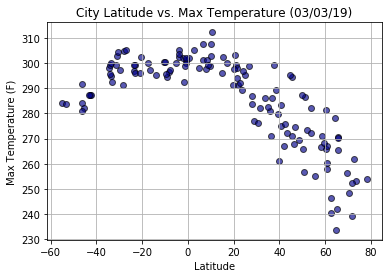

In [97]:
plt.scatter(lat, max_temp, marker="o", facecolors="darkblue", edgecolors="black", alpha=0.65)
plt.title(f"City Latitude vs. Max Temperature ({time.strftime('%m/%d/%y', now)})")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (F)")
plt.grid(True)

plt.savefig("output_data/max_temp.png")
plt.show()

#### Latitude vs. Humidity Plot

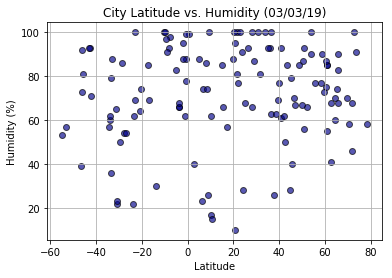

In [98]:
plt.scatter(lat, humidity, marker="o", facecolors="darkblue", edgecolors="black", alpha=0.65)
plt.title(f"City Latitude vs. Humidity ({time.strftime('%m/%d/%y', now)})")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.grid(True)

plt.savefig("output_data/humidity.png")
plt.show()

#### Latitude vs. Cloudiness Plot

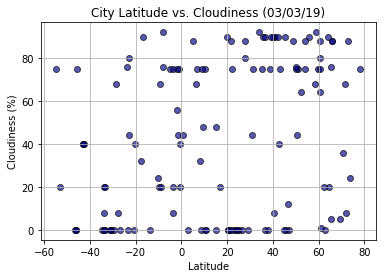

In [99]:
plt.scatter(lat, cloudiness, marker="o", facecolors="darkblue", edgecolors="black", alpha=0.65)
plt.title(f"City Latitude vs. Cloudiness ({time.strftime('%m/%d/%y', now)})")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.grid(True)

plt.savefig("output_data/cloudiness.png")
plt.show()

#### Latitude vs. Wind Speed Plot

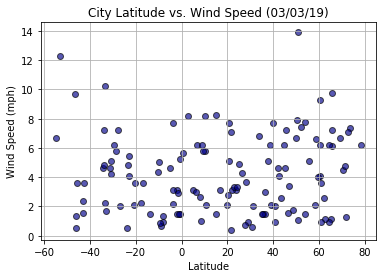

In [91]:
plt.scatter(lat, wind_speed, marker="o", facecolors="darkblue", edgecolors="black", alpha=0.65)
plt.title(f"City Latitude vs. Wind Speed ({time.strftime('%m/%d/%y', now)})")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
plt.grid(True)

plt.savefig("output_data/windspeed.png")
plt.show()